# Tensorflow 1

## MNIST with one-hot encoding

In [103]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Input
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [104]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [105]:
# get shape of x_train
x_train.shape

(60000, 28, 28)

In [106]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
# reshape x_test
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train,num_classes=10)
# encode y_test
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [107]:
# get shape of y_train
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [108]:
# reshape y_train and y_test
y_train = y_train.reshape(-1, 10, 1)
y_test = y_test.reshape(-1, 10, 1)

In [109]:
# Create a simple model
model = Sequential([
    Input(shape=(28, 28,)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'sigmoid')
])


In [110]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# predict x[100]
model.predict(x_train[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[0.5085715 , 0.49857584, 0.5862169 , 0.51051563, 0.4631904 ,
        0.462769  , 0.43928775, 0.6004015 , 0.50915724, 0.45073017]],
      dtype=float32)

In [112]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.MSE)

In [113]:
# Train the model
history = model.fit(x_train, y_train, epochs = 25, batch_size = 512, validation_split = 0.1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0980 - val_loss: 0.0247
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0253 - val_loss: 0.0163
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0183 - val_loss: 0.0128
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0145 - val_loss: 0.0108
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - val_loss: 0.0095
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0086
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0103 - val_loss: 0.0079
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - val_loss: 0.0073
Epoch 9/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - val_loss: 0.0069
Epoch 10/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0081 - val_loss: 0.0065
Epoch 11/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 12/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


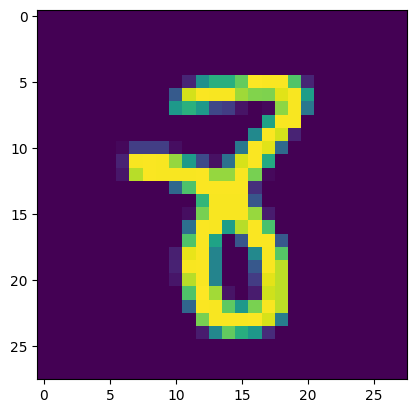

In [114]:
# Check random result

i = random.randint(0,x_test.shape[0])
print(np.round(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [115]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0058


0.00505551602691412

In [116]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test_pred = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred,y_pred)

0.9725

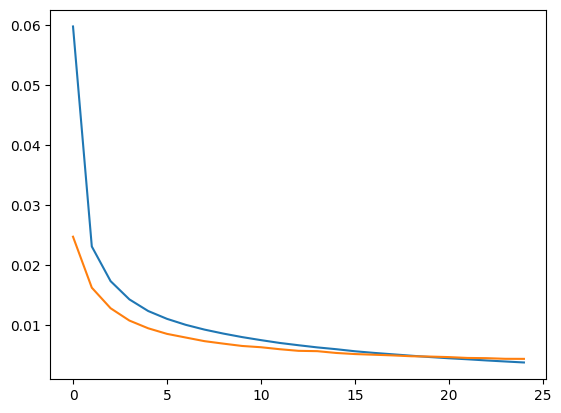

In [118]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

## MNIST with sparse encoding

In [119]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [120]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [121]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [122]:
y_train[100]

np.uint8(5)

In [149]:
# Create a simple model
# copy from before
model = Sequential([
    Input(shape=(28, 28, )),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'sigmoid')
])

In [150]:
model.predict(x_train[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[0.59649485, 0.4401514 , 0.46990407, 0.5105604 , 0.5490755 ,
        0.5329689 , 0.5831097 , 0.5122476 , 0.4927174 , 0.50763613]],
      dtype=float32)

In [151]:
# Compile the model
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [152]:
model.fit(x_train, y_train, epochs = 25, batch_size = 512, validation_split = 0.1)

Epoch 1/25


/home/arnav/ml/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7158 - loss: 1.0496 - val_accuracy: 0.9325 - val_loss: 0.2496
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9191 - loss: 0.2847 - val_accuracy: 0.9488 - val_loss: 0.1937
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9375 - loss: 0.2247 - val_accuracy: 0.9568 - val_loss: 0.1626
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9496 - loss: 0.1804 - val_accuracy: 0.9618 - val_loss: 0.1417
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9577 - loss: 0.1517 - val_accuracy: 0.9658 - val_loss: 0.1266
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9607 - loss: 0.1384 - val_accuracy: 0.9678 - val_loss: 0.1141
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9671 - loss: 0.1182 - val_accuracy: 0.9698 - val_loss: 0.1073
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9720 - loss: 0.1014 - val_accuracy: 0.9722

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
8 8


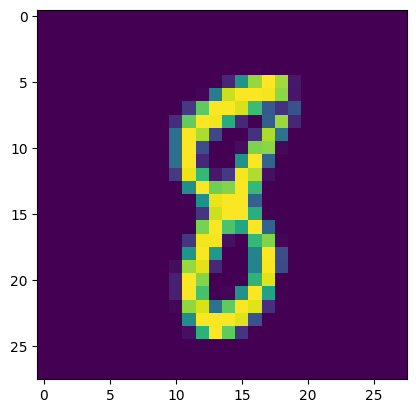

In [134]:
# test random input

i = random.randint(0,x_test.shape[0])
print(np.argmax(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [135]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9761 - loss: 0.0978


[0.08835775405168533, 0.9793000221252441]

In [136]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

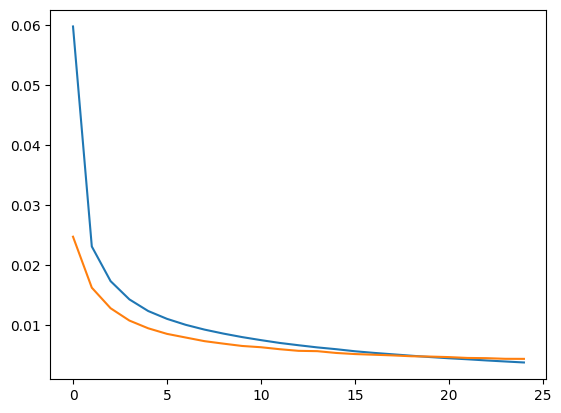

In [139]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);